## Indexing and SQLite3

In [58]:
import sqlite3
db=sqlite3.connect("Employee.sqlite")

In [59]:
cur=db.cursor()
cur

In [12]:
cur.execute('Create table EmployeeDetail (Employeeid int Primary key,Name text, Age int, Department text, Salary int)')

In [13]:
cur.execute('Insert into EmployeeDetail values(100,"Rishav",25,"Marketing",50000)')
cur.execute('Insert into EmployeeDetail values(101,"Abhishek",26,"Operations",60000)')
cur.execute('Insert into EmployeeDetail values(102,"Aman",24,"Human Resources",75000)')


In [62]:
db.close()

In [17]:
#From Employee SQLite Database remove the Employee with employee_id 101?(Without Using Parameter)
cur.execute('delete from EmployeeDetail where employeeid=101')


In [18]:
db.commit()

In [60]:
#From Employee SQLite Database remove the Employee with employeeid 102?(Using Parameter i.e storing employeeid in variable and then executing the SQL query)
eid=100
cur.execute('delete from EmployeeDetail where employeeid=?',(eid,))

In [61]:
db.commit()

OperationalError: database is locked

In [27]:
#A given data of 12 Employees working in an investment firm. So add the Employee Data in Employee SQLite Database of Employee_Detail Table which was created by you.
employee_id=[101,102,103,104,105,106,107,108,109,110,111,112]
name=['Aadarsh','Aarti','Siddharth','Aman','Amit','Shivansh','Vaibhav','Himanshu','Raman','Kunal','Adhira','Tanya']
age=[25,27,25,24,30,26,23,26,25,26,29,24]
department=['Marketing','Operations','Finance','Human Resource','Marketing','IT','Finance','IT','Operations','Marketing','Human Resource','Marketing']
salary=[50000,60000,85000,75000,50000,90000,85000,90000,60000,50000,75000,50000]

import sqlite3
db=sqlite3.connect("Employee.sqlite")
cur=db.cursor()

cur.execute('Create table EmployeeDetail (Employeeid int Primary key,Name text, Age int, Department text, Salary int)')
for i in range(len(employee_id)):
    #print(employee_id[i],name[i],age[i],department[i],salary[i])
    cur.execute('Insert into EmployeeDetail values(?,?,?,?,?)',(employee_id[i],name[i],age[i],department[i],salary[i]))


IntegrityError: UNIQUE constraint failed: EmployeeDetail.Employeeid

In [28]:
db.commit()

In [40]:
#Find the employee_id of employee whose is working in Finance Department in Investment firm from Employee SQLite Database.
import sqlite3
db=sqlite3.connect("Employee.sqlite")
cur=db.cursor()
cur.execute('Select employeeid from employeedetail where Department = "Finance"')
for row in cur:
    for i in row:
        print(i)

103
107


In [44]:
#ta code
import sqlite3
db=sqlite3.connect("Employee.sqlite")
cur=db.cursor()

cur.execute("Create table Employee_Details (employee_id int primary key,name varchar(30),age int,department varchar(50),salary int)")
employee_id=[101,102,103,104,105,106,107,108,109,110,111,112]
name=['Aadarsh','Aarti','Siddharth','Aman','Amit','Shivansh','Vaibhav','Himanshu','Raman','Kunal','Adhira','Tanya']
age=[25,27,25,24,30,26,23,26,25,26,29,24]
department=['Marketing','Operations','Finance','Human Resource','Marketing','IT','Finance','IT','Operations','Marketing','Human Resource','Marketing']
salary=[50000,60000,85000,75000,50000,90000,85000,90000,60000,50000,75000,50000]
arr=[(employee_id[i],name[i],age[i],department[i],salary[i]) for i in range(len(employee_id))]

db.executemany("Insert into employee_details values(?,?,?,?,?)",arr)
db.commit()
cur.execute("Select employee_id from employee_details where department='Finance' ")
ans=cur.fetchall()

for ele in ans:
    print(ele[0])

OperationalError: database is locked

In [64]:
#Find the number of employee working in different department in an investment firm from Employee SQLite Database.
#Print the department and number of employee
import sqlite3
db=sqlite3.connect("Employee.sqlite")
cur=db.cursor()

cur.execute('Select Department,count(*) from employeedetail group by department')
for row in cur:
    for i in row:
        print(i , end=" ")
    print()
db.commit()
db.close()

Finance 2 
Human Resource 2 
IT 2 
Marketing 5 
Operations 2 


## Sqlite3 with pandas

In [69]:
import sqlite3
import pandas as pd 
db=sqlite3.connect("Employee.sqlite")
df=pd.read_sql_query("select * from employeedetail",db)
df

,Employeeid,Name,Age,Department,Salary
0,100,Rishav,25,Marketing,50000
1,101,Aadarsh,25,Marketing,50000
2,102,Aarti,27,Operations,60000
3,103,Siddharth,25,Finance,85000
4,104,Aman,24,Human Resource,75000
5,105,Amit,30,Marketing,50000
6,106,Shivansh,26,IT,90000
7,107,Vaibhav,23,Finance,85000
8,108,Himanshu,26,IT,90000
9,109,Raman,25,Operations,60000


In [71]:
df[df.Age ==25]

,Employeeid,Name,Age,Department,Salary
0,100,Rishav,25,Marketing,50000
1,101,Aadarsh,25,Marketing,50000
3,103,Siddharth,25,Finance,85000
9,109,Raman,25,Operations,60000


In [87]:
#Find the count of each genre present in IMDB movie dataset?
#Print the Genre and number of movies present in that genre.
#Note: Ignore the empty value present in genre.

import sqlite3
import pandas as pd 

db=sqlite3.connect("IMDB.sqlite")
df=pd.read_sql_query("select genre,count(*) as count from genre group by genre",db)

df=df[df.genre!=""]
for index,row in df.iterrows():
    print(row["genre"],row["count"])

db.close()

Action 33
Adventure 43
Animation 13
Biography 21
Comedy 31
Crime 11
Drama 77
Family 3
Fantasy 7
History 6
Horror 2
Music 3
Musical 1
Mystery 7
Romance 13
Sci-Fi 18
Sport 3
Thriller 14
War 2
Western 2


In [109]:
#Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.
#Print the rating of that movie.

import sqlite3
import pandas as pd 

db=sqlite3.connect("IMDB.sqlite")
dfEarning=pd.read_sql_query("select movie_id, domestic+worldwide as TotalEarnings from earning order by TotalEarnings desc limit 1",db)
movieID=dfEarning.Movie_id
#print(movieID[0])

dfRating=pd.read_sql_query("select Rating from IMDB where movie_id ={}".format(movieID[0]),db)
print(dfRating.Rating[0])

db.close()

8.1


In [ ]:
#ref for putting variable in where clause
# https://stackoverflow.com/questions/57297077/use-variable-in-pandas-query

### Assignments

In [114]:
#Find the most voted movie in IMDB Movie Database.
#Print the movie name and the rating of that movie.

import sqlite3
import pandas as pd 

db=sqlite3.connect("IMDB.sqlite")
dfMostVoted=pd.read_sql_query("select  Title, Rating from IMDB order by TotalVotes desc limit 1",db)
for index,row in dfMostVoted.iterrows():
    print(row["Title"],row["Rating"])
db.close()

Inception (2010) 8.8


In [235]:
#Find the Movie with Longest-Running Time from IMDB Movie database.
#Print the name of movie and running time as integer value.

import sqlite3
import pandas as pd 

db = sqlite3.connect("IMDB.sqlite")
df = pd.read_sql_query("select title,runtime from imdb where runtime !=''",db)
df = df.assign(Runtime = lambda x: x['Runtime'].str.extract('(\d+)'))
df.Runtime = df.Runtime.astype(int)
maxRunning = df.Runtime.max()
df = df[df.Runtime==maxRunning]
for index,row in df.iterrows():
    print(row.Title,maxRunning)
db.close()

The Wolf of Wall Street (2013) 180


In [242]:
#Find the movie which has maximum net profit in IMDB Movie Database.
#Print the movie name.
#Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

import sqlite3
import pandas as pd 

db = sqlite3.connect("IMDB.sqlite")
df = pd.read_sql_query("select title,Domestic+WorldWide-budget as NetProfit from imdb join earning on earning.Movie_id = imdb.Movie_id order by NetProfit desc limit 1",db)
for index,row in df.iterrows():
    print(row.Title)
db.close()

Star Wars: The Force Awakens (2015)


In [247]:
#another way
import sqlite3
import pandas as pd 

db = sqlite3.connect("IMDB.sqlite")
df = pd.read_sql_query("select title,Domestic+WorldWide-budget as NetProfit from imdb join earning on earning.Movie_id = imdb.Movie_id ",db)
df=df.sort_values("NetProfit")
df=df.tail(1)
for index,row in df.iterrows():
    print(row.Title)
db.close()

Star Wars: The Force Awakens (2015)


In [266]:
#Find the least budgeted movie in IMDB Movie Database.
#If there is more than one least budgeted movies then print the movie which has maximum net profit.
#Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

import sqlite3
import pandas as pd 

db = sqlite3.connect("IMDB.sqlite")
df = pd.read_sql_query("select title,Domestic+WorldWide TotalCollection , budget,Domestic+WorldWide-Budget  as NetProfit from imdb join earning on earning.Movie_id = imdb.Movie_id order by Budget",db)

LowestBudget = 1e+06
df=df[df.Budget == 1e+06]
maxNetProfit=df.NetProfit.max()
df=df[df.NetProfit==maxNetProfit]
for index,row in df.iterrows():
    print(row.Title)
db.close()

Short Term 12 (2013)


In [330]:
#Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
#Print the Year and name of the movie which was the highest grosser in that year.
#Note:Print the year in ascending order.

import sqlite3
import pandas as pd 

db = sqlite3.connect("IMDB.sqlite")
df = pd.read_sql_query("select title,Domestic+WorldWide TotalCollection from imdb join earning on earning.Movie_id = imdb.Movie_id ",db)
#print(df)
df["Year"]=df["Title"].str[-2:-6:-1].str[::-1]
#df.Year=df.Year.str[::-1]
df=df.sort_values("Year")
#df.Year.value_counts()
#int(df.Year.min())
#int(df.Year.max())

#print(df[df.Year=='2010'])

#_2010maxgross=df[df.Year=='2010'].TotalCollection.max()
#df[df.TotalCollection==_2010maxgross]

for i in range(int(df.Year.min()),int(df.Year.max())+1):
    maxgross=df[df.Year==str(i)].TotalCollection.max()
    print(df[df.TotalCollection==maxgross].Year,df[df.TotalCollection==maxgross].Title)
    #,df[df.TotalCollection==maxgross].Title
    #df1=df[df.TotalCollection==maxgross]



106    2010
Name: Year, dtype: object 106    Toy Story 3 (2010)
Name: Title, dtype: object
67    2011
Name: Year, dtype: object 67    Rise of the Planet of the Apes (2011)
Name: Title, dtype: object
83    2012
Name: Year, dtype: object 83    The Avengers (2012)
Name: Title, dtype: object
94    2013
Name: Year, dtype: object 94    The Hunger Games: Catching Fire (2013)
Name: Title, dtype: object
34    2014
Name: Year, dtype: object 34    Guardians of the Galaxy (2014)
Name: Title, dtype: object
79    2015
Name: Year, dtype: object 79    Star Wars: The Force Awakens (2015)
Name: Title, dtype: object
68    2016
Name: Year, dtype: object 68    Rogue One (2016)
Name: Title, dtype: object


In [ ]:
Toy Story 3 (2010)                          1.481975e+09    2010
Rise of the Planet of the Apes (2011)       658561234.0     2011
The Avengers (2012)                         2.142171e+09    2012
The Hunger Games: Catching Fire (2013)      1.289680e+09    2013
Guardians of the Galaxy (2014)              1.106505e+09    2014
Star Wars: The Force Awakens (2015)         3.004886e+09    2015
Rogue One (2016)                            1.588235e+09    2016

In [ ]:
for i in range(int(df.Year.min()),int(df.Year.max())+1):
    df1=df[df.Year==i]
    df1.TotalCollection.max()

In [331]:
#ta code
import pandas as pd
import sqlite3
import numpy as np

db=sqlite3.connect('IMDB.sqlite')
imdb=pd.read_sql_query("Select * from IMDB",db)
earning=pd.read_sql_query("Select * from earning",db)
genre=pd.read_sql_query("Select * from genre",db)

imdb_earning=pd.merge(imdb,earning,on='Movie_id')

imdb_earning['Domestic'].replace('',0,inplace=True)
imdb_earning['Worldwide'].replace('',0,inplace=True)
imdb_earning['Total Earning']=imdb_earning['Domestic']+imdb_earning['Worldwide']
def findYear(title):
    return int(title.split('(')[-1][:-1])
imdb_earning['Year']=imdb_earning['Title'].apply(findYear)
year=sorted(imdb_earning['Year'].value_counts().index)
for i in range(len(year)):
    earning=max(imdb_earning[imdb_earning['Year']==year[i]]['Total Earning'])
    print(year[i],imdb_earning[imdb_earning['Total Earning']==earning]['Title'].values[0])
    



TypeError: 'int' object is not callable

In [139]:
#Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
#Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
#Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import sqlite3 

db = sqlite3.connect("IMDB.sqlite")
imdb = pd.read_sql_query("Select * from Imdb",db)
earning = pd.read_sql_query("Select * from Earning",db)
genre = pd.read_sql_query("Select * from Genre",db)

imdbEarning=pd.merge(imdb,earning,on="Movie_id")
alldf=pd.merge(imdbEarning,genre,on="Movie_id")

alldf.Budget=pd.to_numeric(alldf.Budget)

genreList = [genre for genre,df in alldf.groupby("genre")]
genreList.sort()
#genrebudget=genreWise.Budget
genreWise = alldf.groupby("genre").sum()

genreList.remove("")
genreWise.to_csv("Genrewise.csv")
genreWise = pd.read_csv("Genrewise.csv")
genreWise = genreWise.dropna(how="any")

#print(len(genreList))
#print(len(genreWise))


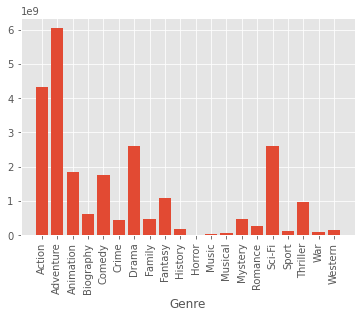

In [140]:
plt.bar(genreList,genrebudget)
plt.xticks(rotation="vertical")
plt.yticks()
plt.xlabel("Genre")
plt.show()

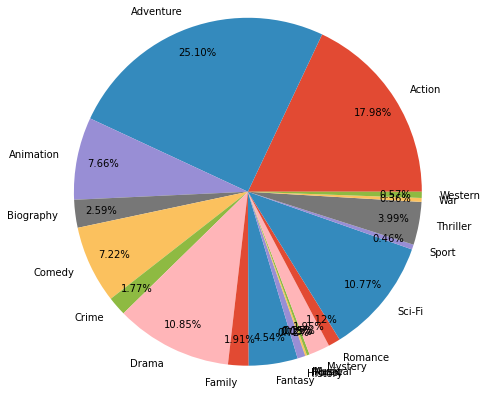

In [143]:
budget=[]
for index,row in genreWise.Budget.iteritems():
    budget.append(row)
npBudget = np.array(budget)

plt.pie(npBudget, labels=genreList,labeldistance=1.1,autopct="%.2f%%",pctdistance=.85,radius=2)
plt.style.use("ggplot")
plt.show()

In [142]:

for i in range(len(genreList)):
    print(genreList[i],    format((npBudget[i]*100)/sum(npBudget),".2f" ))
    

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


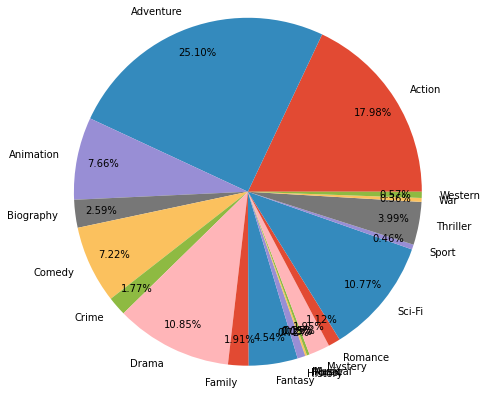

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


In [144]:
#My final code for above problem
#Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
#Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
#Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import sqlite3 

db = sqlite3.connect("IMDB.sqlite")
imdb = pd.read_sql_query("Select * from Imdb",db)
earning = pd.read_sql_query("Select * from Earning",db)
genre = pd.read_sql_query("Select * from Genre",db)

imdbEarning=pd.merge(imdb,earning,on="Movie_id")
alldf=pd.merge(imdbEarning,genre,on="Movie_id")

alldf.Budget=pd.to_numeric(alldf.Budget)

genreList = [genre for genre,df in alldf.groupby("genre")]
genreList.sort()

genreWise = alldf.groupby("genre").sum()

genreList.remove("")
genreWise.to_csv("Genrewise.csv")
genreWise = pd.read_csv("Genrewise.csv")
genreWise = genreWise.dropna(how="any")

budget=[]
for index,row in genreWise.Budget.iteritems():
    budget.append(row)
npBudget = np.array(budget)

plt.pie(npBudget, labels=genreList,labeldistance=1.1,autopct="%.2f%%",pctdistance=.85,radius=2)
plt.style.use("ggplot")
plt.show()

for i in range(len(genreList)):
    print(genreList[i],    format((npBudget[i]*100)/sum(npBudget),".2f" ))
    

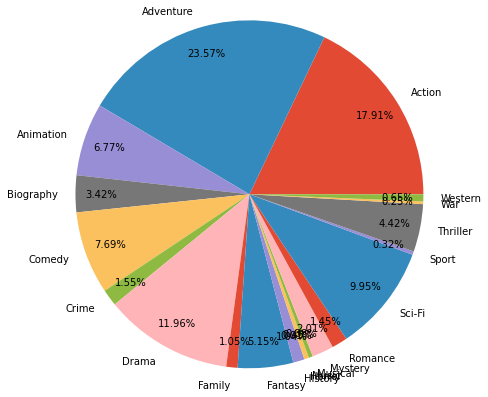

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


In [154]:
#Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.
#Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.
#Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

#My final code for above problem
#Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
#Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
#Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import sqlite3 

db = sqlite3.connect("IMDB.sqlite")
imdb = pd.read_sql_query("Select * from Imdb",db)
earning = pd.read_sql_query("Select * from Earning",db)
genre = pd.read_sql_query("Select * from Genre",db)

imdbEarning=pd.merge(imdb,earning,on="Movie_id")
alldf=pd.merge(imdbEarning,genre,on="Movie_id")
alldf["TotalEarned"] = alldf.Domestic + alldf.Worldwide

genreList = [genre for genre,df in alldf.groupby("genre")]
genreList.sort()
genreList.remove("")

genreWiseEarning = alldf.groupby("genre").sum()
genreWiseEarning.to_csv("GenrewiseEarning.csv")
genreWiseEarning = pd.read_csv("GenrewiseEarning.csv")
genreWiseEarning = genreWiseEarning.dropna(how="any")

earned=[]
for index,row in genreWiseEarning.TotalEarned.iteritems():
    earned.append(row)
npEarned = np.array(earned)

plt.pie(npEarned, labels=genreList,labeldistance=1.1,autopct="%.2f%%",pctdistance=.85,radius=2)
plt.style.use("ggplot")
plt.show()

for i in range(len(genreList)):
    print(genreList[i],    format((npEarned[i]*100)/sum(npEarned),".2f" ))

In [28]:
#Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.
#Print the movie name.
#Movies has multiple genre.

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import sqlite3 

db = sqlite3.connect("IMDB.sqlite")
imdb = pd.read_sql_query("Select * from Imdb",db)
genre = pd.read_sql_query("Select * from Genre",db)
alldf=pd.merge(imdb,genre,on="Movie_id")

alldf["genre"].replace("",np.nan,inplace=True)
alldf["Rating"].replace("",0,inplace=True)

filtDF = alldf[(alldf.Rating>=8) & (alldf.genre=="Sci-Fi") | (alldf.genre=="Mystery")]
filtDF=filtDF.drop(columns=['TotalVotes', 'MetaCritic', 'Budget',
       'Runtime', 'CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06',
       'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01',
       'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F',
       'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'VotesIMDB', 'Votes1000', 'VotesUS', 'VotesnUS'])
filtDF.reset_index(drop=True,inplace=True)

Finaldf=filtDF[filtDF.duplicated(subset=['Title'])]
Finaldf.sort_values(by=['Rating'],ascending=False)
Finaldf.reset_index(drop=True,inplace=True)

for i,row in Finaldf.Title.iteritems():
       if i==0:
              print(row)



Arrival (2016)


In [ ]:
nptitleList = np.array(filtDF.Title)
nprating = np.array(filtDF.Rating)

print("----------------------------------------------------")
for i in range(len(nptitleList)):
    print(nptitleList[i],nprating[i])

In [ ]:

'''
for index,row in filtDF.iteritems():
    l=[]
    l.append(row["genre"])
    if "Mystery" in l and "Sci-Fi" in l:
        rat=(row["Rating"].values)
        if 8 in rat:
            print(index)'''
.sort_values(by=['Rating'])
#filtDF.groupby("Title").sum()

#filtDF.sort_values(by=['Rating'])
#print("Arrival (2016)")